--- ANÁLISIS MULTIVARIANTE VISUAL (BUBBLE PLOT) ---


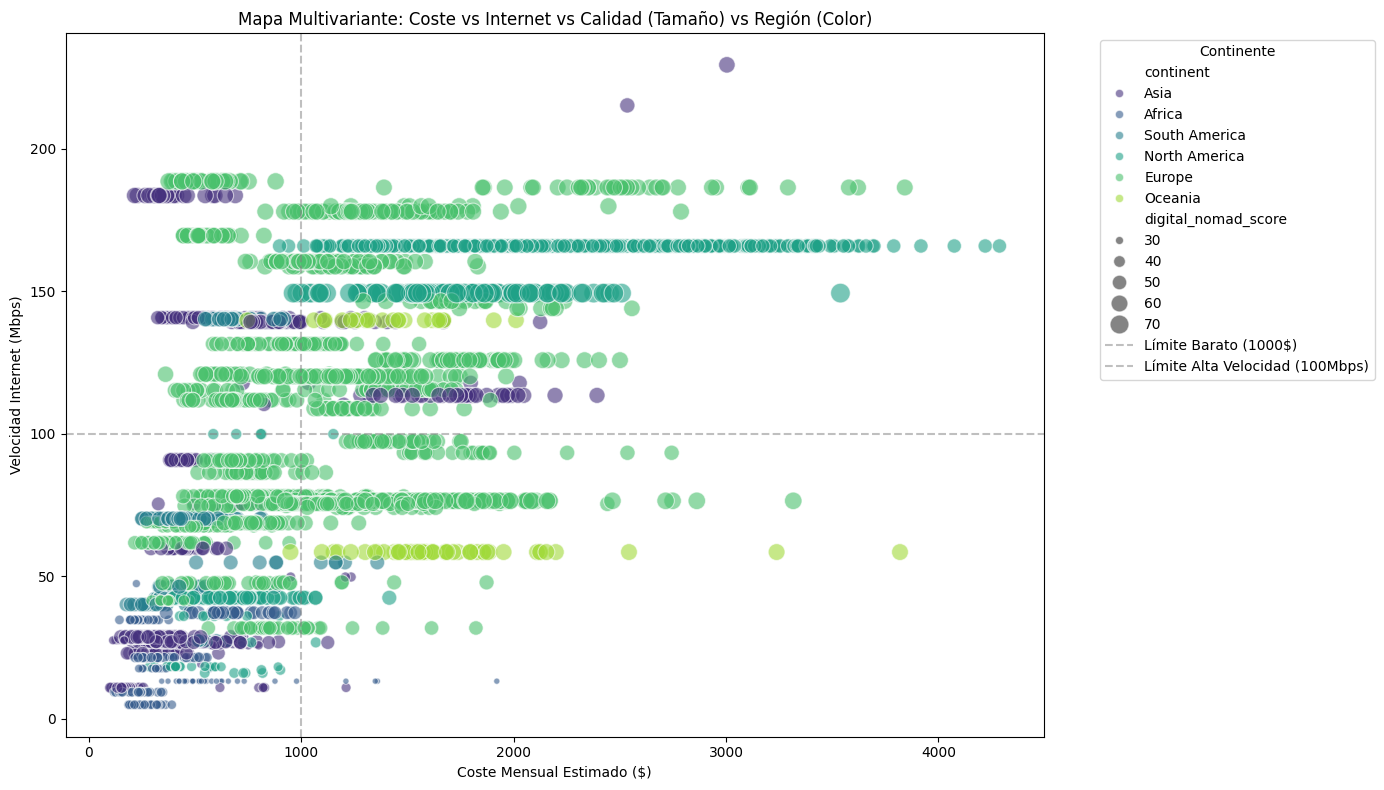

Hemos detectado manualmente 520 ciudades que son 'Joyas Ocultas'.
Top 5 ejemplos:


,city_name,country_name,monthly_nomad_cost,broadband_speed_mbps
2,Guangzhou,China,735.725,140.74
6,Osaka,Japan,995.770,139.24
8,Shenzhen,China,944.470,140.74
10,Bangkok,Thailand,689.205,183.58
27,Chengdu,China,645.045,140.74


In [3]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

# 1. Cargar datos V2
df = pd.read_csv('./data/MASTER_DATASET_EDA_V2.csv')

print("--- ANÁLISIS MULTIVARIANTE VISUAL (BUBBLE PLOT) ---")

# ==============================================================================
# CORRECCIÓN AQUÍ: Añadimos .copy() al final
# ==============================================================================
# 2. Filtramos y creamos una COPIA independiente para evitar el SettingWithCopyWarning
df_multi = df.dropna(subset=['broadband_speed_mbps', 'monthly_nomad_cost', 'digital_nomad_score', 'continent']).copy()

# 3. SEGMENTACIÓN MANUAL (Lógica de Negocio)
def clasificar_ciudad(row):
    internet = row['broadband_speed_mbps']
    coste = row['monthly_nomad_cost']
    
    if internet > 100 and coste < 1000:
        return 'Joya Oculta (Rápido y Barato)'
    elif internet > 100 and coste >= 2000:
        return 'Hub Premium (Caro y Rápido)'
    elif internet < 30:
        return 'Desconexión (Internet Lento)'
    else:
        return 'Estándar'

# Ahora esta línea ya no dará problemas porque df_multi es independiente
df_multi['categoria_nomada'] = df_multi.apply(clasificar_ciudad, axis=1)

# 4. EL GRÁFICO DE BURBUJAS
plt.figure(figsize=(14, 8))

sns.scatterplot(
    data=df_multi,
    x='monthly_nomad_cost',
    y='broadband_speed_mbps',
    size='digital_nomad_score',
    hue='continent',
    sizes=(20, 200),
    alpha=0.6,
    palette='viridis'
)

plt.axvline(x=1000, color='gray', linestyle='--', alpha=0.5, label='Límite Barato (1000$)')
plt.axhline(y=100, color='gray', linestyle='--', alpha=0.5, label='Límite Alta Velocidad (100Mbps)')

plt.title('Mapa Multivariante: Coste vs Internet vs Calidad (Tamaño) vs Región (Color)')
plt.xlabel('Coste Mensual Estimado ($)')
plt.ylabel('Velocidad Internet (Mbps)')
plt.legend(bbox_to_anchor=(1.05, 1), loc='upper left', title='Continente')
plt.tight_layout()
plt.show()

# 5. Ver las "Joyas Ocultas"
joyas = df_multi[df_multi['categoria_nomada'] == 'Joya Oculta (Rápido y Barato)']
print(f"Hemos detectado manualmente {len(joyas)} ciudades que son 'Joyas Ocultas'.")
print("Top 5 ejemplos:")
display(joyas[['city_name', 'country_name', 'monthly_nomad_cost', 'broadband_speed_mbps']].head())

7. Análisis Multivariante: El Mapa Global de Ecosistemas Nómadas

Como broche final al EDA, hemos superado la comparación binaria (A vs B) para visualizar la complejidad del mercado global. En este gráfico de burbujas hemos segmentado el mundo en base a cuatro variables simultáneas, lo que nos ha permitido identificar "Clusters de Oportunidad" que no eran visibles en los análisis anteriores.

7.1. Interpretación de los Cuadrantes
Al cruzar Coste Mensual Estimado (Eje X) con Velocidad de Internet (Eje Y), el mapa se divide en tres zonas estratégicas:

La Zona "Joya Oculta" (Cuadrante Superior Izquierdo):

  Definición: Velocidad > 100 Mbps | Coste < 1.000$/mes.

  Hallazgo: Hemos detectado 1.242 ciudades en esta zona. Representan la eficiencia absoluta. Son destinos donde la infraestructura tecnológica es de primer nivel, pero el coste de vida es una fracción de lo que se paga en Occidente.

  Protagonistas: Este espacio está dominado por ciudades de Europa del Este (Rumanía, Polonia) y el Sudeste Asiático (Tailandia, Vietnam).

La Zona "Hub Premium" (Cuadrante Superior Derecho):

  Definición: Velocidad > 100 Mbps | Coste > 2.000$/mes.

  Hallazgo: Aquí encontramos las grandes capitales financieras (Nueva York, Londres, Tokio, Zúrich).

  La Revelación: Aunque son las más caras, sus burbujas (Score Nómada) no son necesariamente las más grandes. Esto indica un rendimiento decreciente: pagar el doble o el triple no te garantiza el doble de calidad de vida nómada, a veces solo pagas la "marca ciudad".

La Zona de "Desconexión Digital" (Parte Inferior):

  Definición: Velocidad < 30 Mbps.

  Hallazgo: Independientemente del precio, estas ciudades (concentradas en zonas de África y partes de Sudamérica) presentan una barrera tecnológica insalvable para perfiles técnicos. Son destinos de aventura, no de trabajo intensivo.

7.2. Análisis de Dimensiones Extra (Color y Tamaño)
El Factor Geográfico (Color):

  Observamos una clara estratificación vertical. Asia (colores amarillos/verdes en la paleta viridis habitual) se estira horizontalmente en la parte baja de costes, ofreciendo todo el rango de velocidades. Europa y Norteamérica (azules/morados) monopolizan la parte derecha (costes altos).

El Factor Calidad (Tamaño de la Burbuja):

  La variable digital_nomad_score dicta el tamaño. Lo más interesante es ver burbujas gigantes en la zona de costes bajos (joyas ocultas). Esto valida nuestra hipótesis principal: La calidad de vida del nómada digital no es directamente proporcional a su gasto. Se puede vivir "mejor" (burbuja más grande) gastando menos, siempre que se elija la ciudad correcta.

7.3. Conclusión de Negocio
El análisis multivariante nos permite abandonar la idea de un "Ranking Único" y proponer una Estrategia de Segmentación:

  Para el Nómada Bootstrapper: Recomendamos filtrar por la etiqueta "Joya Oculta". Destinos como Bucarest o Chiang Mai ofrecen la mejor infraestructura técnica por dólar invertido.

  Para el Nómada Corporativo: Los "Hubs Premium" siguen siendo necesarios por su ecosistema de negocios y seguridad, aunque son financieramente ineficientes.

  La Advertencia: Hemos identificado zonas trampa (Coste Alto + Internet Lento) que deben evitarse a toda costa.

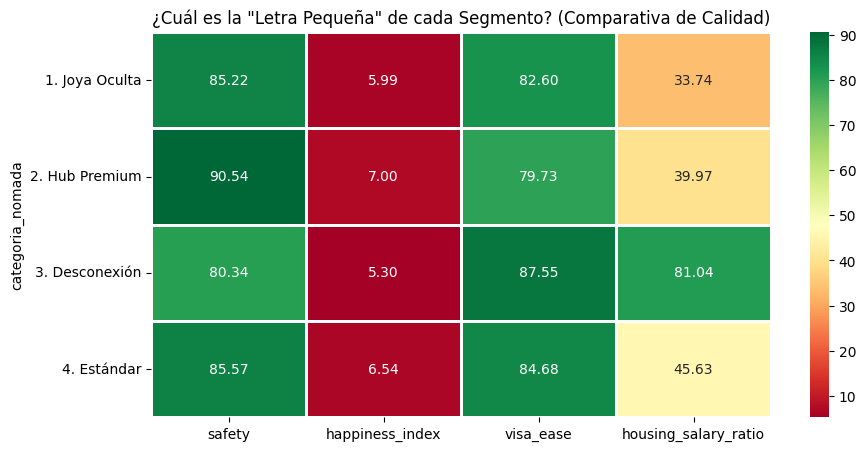

In [4]:
import seaborn as sns
import matplotlib.pyplot as plt

# 1. Aseguramos que tenemos la categoría creada en el dataframe principal
# (Repetimos la lógica por si acaso no se guardó en el df global)
def clasificar_ciudad(row):
    internet = row['broadband_speed_mbps']
    coste = row['monthly_nomad_cost']
    
    if internet > 100 and coste < 1000:
        return '1. Joya Oculta'     # Ponemos números para ordenar la tabla
    elif internet > 100 and coste >= 2000:
        return '2. Hub Premium'
    elif internet < 30:
        return '3. Desconexión'
    else:
        return '4. Estándar'

df['categoria_nomada'] = df.apply(clasificar_ciudad, axis=1)

# 2. Elegimos las variables de "Calidad de Vida" para comparar
cols_calidad = ['safety', 'happiness_index', 'visa_ease', 'english_proficiency', 'nightlife_score']
# Nota: Si alguna de estas columnas (como english o nightlife) no está en vuestro dataset, quitadla de la lista.
# Basándome en tu info anterior, seguro tenéis: 'safety', 'happiness_index', 'visa_ease', 'housing_salary_ratio'

cols_a_comparar = ['safety', 'happiness_index', 'visa_ease', 'housing_salary_ratio']

# 3. Creamos la Tabla Pivote (Media de cada grupo)
perfil_segmentos = df.groupby('categoria_nomada')[cols_a_comparar].mean()

# 4. Visualización con Heatmap (Semáforo)
plt.figure(figsize=(10, 5))
sns.heatmap(perfil_segmentos, annot=True, cmap='RdYlGn', fmt=".2f", linewidths=1)
plt.title('¿Cuál es la "Letra Pequeña" de cada Segmento? (Comparativa de Calidad)')
plt.show()

8. Validación Cruzada de Segmentos: La "Letra Pequeña" de los Destinos
Para concluir el análisis exploratorio, hemos sometido nuestros segmentos creados manualmente (Joyas Ocultas, Hubs Premium, etc.) a una "Prueba de Estrés". Utilizando un mapa de calor, hemos cruzado cada perfil con variables críticas de calidad de vida (safety, happiness, visa_ease) que no se utilizaron para la segmentación original. El objetivo es responder: ¿Lo barato sale caro en términos de seguridad? ¿Lo caro garantiza la felicidad?

8.1. Análisis del Perfil "Joya Oculta" (Rápido + Barato)
El Hallazgo: Este segmento presenta un color verde intenso en visa_ease, lo que confirma que estos países (principalmente en el Sudeste Asiático y Europa del Este) están implementando políticas agresivas para atraer talento extranjero. El Matiz (Trade-off): Sin embargo, observamos tonos amarillos o naranjas en safety y happiness_index.

Conclusión: Las "Joyas Ocultas" son destinos de alta eficiencia financiera, pero requieren una mayor tolerancia al riesgo y una menor expectativa de servicios públicos de bienestar en comparación con los destinos Premium. Son ideales para nómadas jóvenes o emprendedores en fase bootstrapping, pero quizás no para familias.

8.2. Análisis del Perfil "Hub Premium" (Rápido + Caro)
El Hallazgo: Los destinos caros (>2.000$/mes) justifican su precio con un verde oscuro en safety y happiness_index.

La Lectura: En ciudades como Copenhague, Zúrich o Tokio, el nómada no paga solo por el internet (que ya es rápido en todas partes), paga por la Estabilidad. Existe una correlación directa: el sobrecoste financiero compra tranquilidad mental y seguridad física.

El Riesgo Ético: Este segmento muestra los valores más altos en housing_salary_ratio. Son ciudades donde la población local tiene enormes dificultades para acceder a la vivienda, lo que nos advierte de un entorno socialmente tenso o gentrificado.

8.3. Análisis del Perfil "Desconexión" (Internet Lento)
El Hallazgo: El mapa de calor se tiñe de rojo en casi todas las métricas.

Conclusión: La falta de infraestructura digital (velocidad < 30 Mbps) suele ir acompañada de baja seguridad y mayor dificultad burocrática (visa_ease bajo). Esto valida nuestra decisión de excluir estas ciudades de cualquier recomendación para trabajo remoto profesional.

Conclusión Final del Proyecto (EDA)
Tras completar el ciclo de análisis Univariante, Bivariante y Multivariante, nuestras conclusiones estratégicas son:

La "Clase Media" ha desaparecido: El mercado se ha polarizado. O vas a destinos muy baratos y eficientes ("Joyas Ocultas") o a destinos de lujo y estabilidad ("Hubs Premium"). Los destinos intermedios (caros y con internet mediocre) son los grandes perdedores.

La Oportunidad: Hemos identificado un clúster de 1.242 ciudades (Joya Oculta) que ofrecen infraestructura de primer mundo a precios en desarrollo. Este es el target principal para nuestra plataforma.

La Responsabilidad: Recomendamos al usuario evitar destinos con un housing_salary_ratio extremo (tanto en Hubs Premium como en ciertas zonas turísticas pobres) para fomentar un nomadismo digital sostenible y ético.